## Maximum Likelihood as a linear regression problem

**Goal:** Demonstrate the maximum likelihood approach for regression on a simple example. 

**Usage:** Step through the code to get a better understanding.

**Dataset:** 

**Content:**

[open in colab](https://colab.research.google.com/github/tensorchiefs/dl_book/blob/master/chapter_04/nb_ch04_03.ipynb)

#### Imports

In [1]:
import tensorflow as tf
try: #If running in colab 
    import google.colab
    IN_COLAB = True 
except:
    IN_COLAB = False
if (not tf.__version__.startswith('2')): #Checking if tf 2.0 is installed
    if IN_COLAB: #If running in colab install tf 2.0
        !pip install tensorflow==2.0.0-alpha0  
    print('Please install tensorflow 2.0 to run this notebook')
print('Tensorflow version: ',tf.__version__, ' running in colab?: ', IN_COLAB)

Tensorflow version:  2.0.0-alpha0  running in colab?:  True


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten , Activation
from tensorflow.keras import optimizers

tf.__version__

'2.0.0-alpha0'

Here we read in the systolic blood pressure and the age of the 33 American women in our dataset. Then we use the sklearn library to find the optimal values for the slope a and the intercept b.

Calculates the density $f(y,\mu,\sigma)$ of a normal distribution at $y$, given the parameters $\mu$ and $\sigma$ using:

$$
  f(y, \mu, \sigma) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(y - \mu)^2}{2 \sigma^2}}
$$



In [0]:
def f(y, mu, sigma=20):
  return (1/(sigma * tf.math.sqrt(2 * np.pi)) * tf.math.exp( - (y - mu)**2 / (2 * sigma**2)))

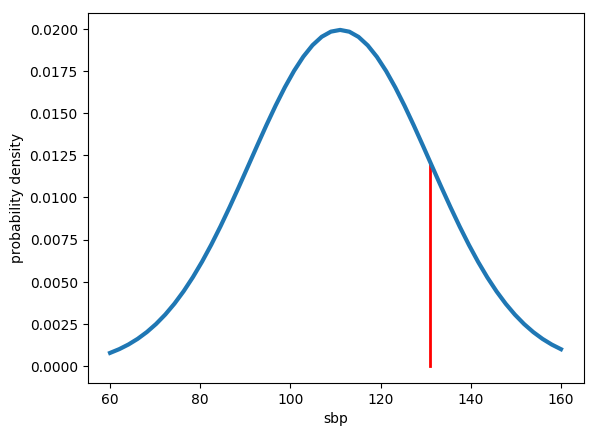

In [4]:
plt.style.use('default') 
sbp = np.linspace(60,160,50, dtype='float32')
plt.plot([131, 131], [0, f(131,111)], 'k-', lw=2,color='red')
plt.plot(sbp, f(sbp, 111),linewidth=3)
plt.xlabel('sbp')
plt.ylabel('probability density')
plt.savefig('ch4_10b.pdf')

In [5]:
f(131, 111)

<tf.Tensor: id=57, shape=(), dtype=float32, numpy=0.012098536>

In [0]:
# Blood Pressure data
x = [22, 41, 52, 23, 41, 54, 24, 46, 56, 27, 47, 57, 28, 48, 58,  9, 
     49, 59, 30, 49, 63, 32, 50, 67, 33, 51, 71, 35, 51, 77, 40, 51, 81]
y = [131, 139, 128, 128, 171, 105, 116, 137, 145, 106, 111, 141, 114, 
     115, 153, 123, 133, 157, 117, 128, 155, 122, 183,
     176,  99, 130, 172, 121, 133, 178, 147, 144, 217] 
x = np.asarray(x, np.float32) 
y = np.asarray(y, np.float32)
n = len(y)

Creating a custom loss function. In order to create a custom loss function in Keras. You have to follow the interface 
 `loss(y_true, y_pred)`.
 
Here we define the loss as follows:
$
    l = -\sum_{i=1}^n \log (f(y_i, a \cdot x+b)) =  -\sum_{i=1}^n \log(f(y_i, ypred_i)) 
$

In [0]:
# 10          20       30        40       50         55
#1234567890123456789012345678901234567890123456789012345

def my_loss(y_true,y_pred): #A
  loss = -tf.reduce_sum(tf.math.log(f(y_true,y_pred)))
  return loss

model = Sequential() #B
model.add(Dense(1, activation='linear', #B
                batch_input_shape=(None, 1)))
model.compile(loss=my_loss,optimizer="adam")

#A Definition of a custom loss function
#B Set up of a network being equivalent to linear regression. One linear activation and a bias term.

In [11]:
for i in range(0,80000):
    model.fit(x=x,y=y,batch_size=33,
                    epochs=1,
                    verbose = 0)
    a,b=model.get_weights()
    if i % 5000==0:
        mse=np.mean(np.square(model.predict(x).reshape(len(x),)-y))
        print("Epoch:",i,"slope=",a[0][0],"intercept=",b[0],"MSE=",mse)

#Should reach (you might need to do more iteration)
#1.   optimal value for slope: 1.1050216
#2.   optimal value for intercept: 87.67143
#3.   minimal MSE: 349.200787168560

Epoch: 0 slope= 0.1902742 intercept= 0.0009999998 MSE= 17434.85
Epoch: 5000 slope= 2.7243905 intercept= 3.1057682 MSE= 1142.8615
Epoch: 10000 slope= 2.6619205 intercept= 6.9357505 MSE= 1072.3474
Epoch: 15000 slope= 2.5664752 intercept= 11.858885 MSE= 986.84296
Epoch: 20000 slope= 2.4713182 intercept= 16.792974 MSE= 906.54474
Epoch: 25000 slope= 2.3762856 intercept= 21.72347 MSE= 831.70105
Epoch: 30000 slope= 2.2813647 intercept= 26.645834 MSE= 762.3614
Epoch: 35000 slope= 2.186582 intercept= 31.563868 MSE= 698.4519
Epoch: 40000 slope= 2.0919845 intercept= 36.471233 MSE= 640.03015
Epoch: 45000 slope= 1.9975013 intercept= 41.37312 MSE= 587.0081
Epoch: 50000 slope= 1.9032726 intercept= 46.262676 MSE= 539.43085
Epoch: 55000 slope= 1.8092016 intercept= 51.14114 MSE= 497.24835
Epoch: 60000 slope= 1.715581 intercept= 56.001522 MSE= 460.47348
Epoch: 65000 slope= 1.6223841 intercept= 60.839268 MSE= 429.075
Epoch: 70000 slope= 1.5294976 intercept= 65.65117 MSE= 402.99564
Epoch: 75000 slope= 1.43

### Independence of sigma

<img src="https://raw.githubusercontent.com/tensorchiefs/dl_book/master/imgs/paper-pen.png" width="60" align="left" />  


*Exercise: Change the value of sigma in the calculation of the likelihood. Does the result depend on it?

### 2 Optimizing Sigma



In [0]:
#!pip install ipywidgets

In [13]:
from ipywidgets import interactive
plt.figure(figsize=(5,5))
ys=np.array([131,105,114,117], dtype='float32')
sbp = np.linspace(80,140,200, dtype='float32')

def make_interactive(mu, sigma):
    likelihoods = f(ys, mu,sigma)
    for i in range(4):
        plt.plot([ys[i], ys[i]], [0, likelihoods[i]], 'k-', lw=1,color='red') 
    plt.plot(sbp, f(sbp, mu,sigma),linewidth=3)
    plt.xlabel('sbp')
    plt.ylabel('likelihood')
    plt.title('NLL: {:.2f}'.format(-np.sum(np.log(likelihoods))))

interactive(make_interactive,mu=(90, 130, 1), sigma=(2,20,1))

interactive(children=(IntSlider(value=110, description='mu', max=130, min=90), IntSlider(value=11, description…

<Figure size 500x500 with 0 Axes>

#### Note TODO After release of TF 2.0

Needs some inverstigation. How to do this the TF2.0 way after the release.

In [0]:
mu     = tf.Variable(10.0)
sigma =  tf.Variable(124.0)
variables = [mu,sigma]
#eta = 0.0004
#likelihoods = f(ys, mu,sigma)
#loss = -tf.math.reduce_sum(tf.math.log(likelihoods)) 
optimizer = tf.optimizers.Adam()


In [20]:
for i in range(2000):
  with tf.GradientTape() as tape: #Record the gradients from now on
    likelihoods = f(ys, mu,sigma)
    loss = -tf.math.reduce_sum(tf.math.log(likelihoods))
    grads = tape.gradient(loss, variables)
    optimizer.apply_gradients(zip(grads, variables))
    #grad_mu, grad_sigma  = tape.gradient(loss, [mu,sigma])
    #mu = tf.Variable(mu - eta * grad_mu)
    #sigma = tf.Variable(sigma - eta * grad_sigma)

    if (i % 200 == 0):
      print("Epoch:",i, "slope=",mu.numpy(),"intercept=",sigma.numpy(), "mse=", loss.numpy())

Epoch: 0 slope= 10.801973 intercept= 123.19701 mse= 24.421581
Epoch: 200 slope= 11.002441 intercept= 122.99559 mse= 24.41431
Epoch: 400 slope= 11.2030945 intercept= 122.794174 mse= 24.407022
Epoch: 600 slope= 11.403748 intercept= 122.59276 mse= 24.399723
Epoch: 800 slope= 11.604551 intercept= 122.39134 mse= 24.392406
Epoch: 1000 slope= 11.805395 intercept= 122.189926 mse= 24.385073
Epoch: 1200 slope= 12.006239 intercept= 121.98851 mse= 24.377728
Epoch: 1400 slope= 12.207257 intercept= 121.78668 mse= 24.370361
Epoch: 1600 slope= 12.408292 intercept= 121.58374 mse= 24.362974
Epoch: 1800 slope= 12.609326 intercept= 121.3808 mse= 24.355572
